SAR Link Budget

In [70]:
# need pulse repetition frequency
# SAR duty factor = Teff * PRF, Teff: effective pulse width
# side-looking angle

In [71]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [72]:
# Constants
c = 3e8  # Speed of light (m/s)
k = 1.38e-23  # Boltzmann's constant (J/K)
T0 = 290  # Standard noise temperature (K)
L = 1  # System loss factor (assumed to be 1 for now)

# System Parameters
bandwidth_Hz = 1.15e9  # Bandwidth in Hz
transmit_power_dBm = 30  # Transmit power in dBm
antenna_gain_dBi = 31  # Antenna gain in dBi
high_f = 8.4e9  # High frequency in Hz
low_f = 7.25e9  # Low frequency in Hz
noise_figure_dB = 5  # Noise figure in dB
element_spacing = 0.22  # Element spacing in meters
array_size = 10  # Array size (side length for square array) in meters
h = 615  # km, orbital height

# Platform parameters
def orbital_velocity(h):
    R_earth = 6371e3  # Radius of the Earth in meters
    G = 6.67430e-11  # Gravitational constant
    M_earth = 5.972e24  # Mass of the Earth in kg
    return np.sqrt(G * M_earth / (R_earth + h * 1e3))

v = orbital_velocity(h)  # Orbital velocity (m/s)

# Radar signal config
f = 7.825e9  # Frequency (Hz)
λ = c / f  # Wavelength (m)
bw = 1.15e9  # Bandwidth (Hz)

# Frequency calculations
center_freq = (high_f + low_f) / 2  # Center frequency in Hz
wavelength = c / center_freq  # Wavelength in meters



In [73]:
# Effective Aperture
def effective_aperture(antenna_gain_dBi, wavelength):
    # Approximate effective aperture calculation
    return (wavelength**2 * 10**(antenna_gain_dBi / 10)) / (4 * np.pi)

# Free-Space Path Loss (L_fs)
def free_space_path_loss(range_meters, frequency_Hz):
    return 20 * np.log10(range_meters) + 20 * np.log10(frequency_Hz / 1e9) - 2*antenna_gain_dBi  # L_fs in dB

# Slant Range Resolution
def slant_range_resolution(bandwidth):
    return c / (2 * bandwidth)

# Noise Power
def noise_power(k, T0, bandwidth, noise_figure_dB):
    noise_power_linear = k * T0 * bandwidth
    noise_power_dBm = 10 * np.log10(noise_power_linear)
    return noise_power_dBm + noise_figure_dB

# SNR
def snr(transmit_power_dBm, antenna_gain_dBi, noise_power_dBm, range_meters):
    received_power_dBm = transmit_power_dBm + 2 * antenna_gain_dBi - 20 * np.log10(range_meters) - 20 * np.log10(center_freq / 1e9) + 20 * np.log10(wavelength)
    return received_power_dBm - noise_power_dBm

# Calculations
slant_range_res = slant_range_resolution(bandwidth_Hz)
noise_power_dBm = noise_power(k, T0, bandwidth_Hz, noise_figure_dB)

# For SNR calculation
range_meters = 900e3  # Example slant range, 615 km - WRONG
snr_value = snr(transmit_power_dBm, antenna_gain_dBi, noise_power_dBm, range_meters)
free_space_loss_dB = free_space_path_loss(range_meters, center_freq)
received_power_dBm = transmit_power_dBm + antenna_gain_dBi - free_space_loss_dB

# Effective Aperture
effective_aperture_m2 = effective_aperture(antenna_gain_dBi, wavelength)

# Number of Elements and Element Spacing
num_elements = (array_size / element_spacing) ** 2

# # Noise Power Calculation
noise_power_dBm = noise_power(k, T0, bandwidth_Hz, noise_figure_dB)


In [74]:
# Print results
print(f"Element Spacing: {element_spacing:.2f} meters")
print(f"Array Size (Side length for square array): {array_size:.2f} meters")
print(f"Number of Elements: {int(num_elements)} elements")
print(f"Effective Aperture at 50 degrees: {effective_aperture_m2:.2f} square meters")
print(f"Free-Space Path Loss (L_fs): {free_space_loss_dB:.2f} dB") # should be positive
print(f"Received Signal Power (P_r): {received_power_dBm:.2f} dBm")
print(f"Noise Power (P_n): {noise_power_dBm:.2f} dBm")
print(f"SNR: {snr_value:.2f} dB")

Element Spacing: 0.22 meters
Array Size (Side length for square array): 10.00 meters
Number of Elements: 2066 elements
Effective Aperture at 50 degrees: 0.15 square meters
Free-Space Path Loss (L_fs): 74.95 dB
Received Signal Power (P_r): -13.95 dBm
Noise Power (P_n): -108.37 dBm
SNR: 35.09 dB


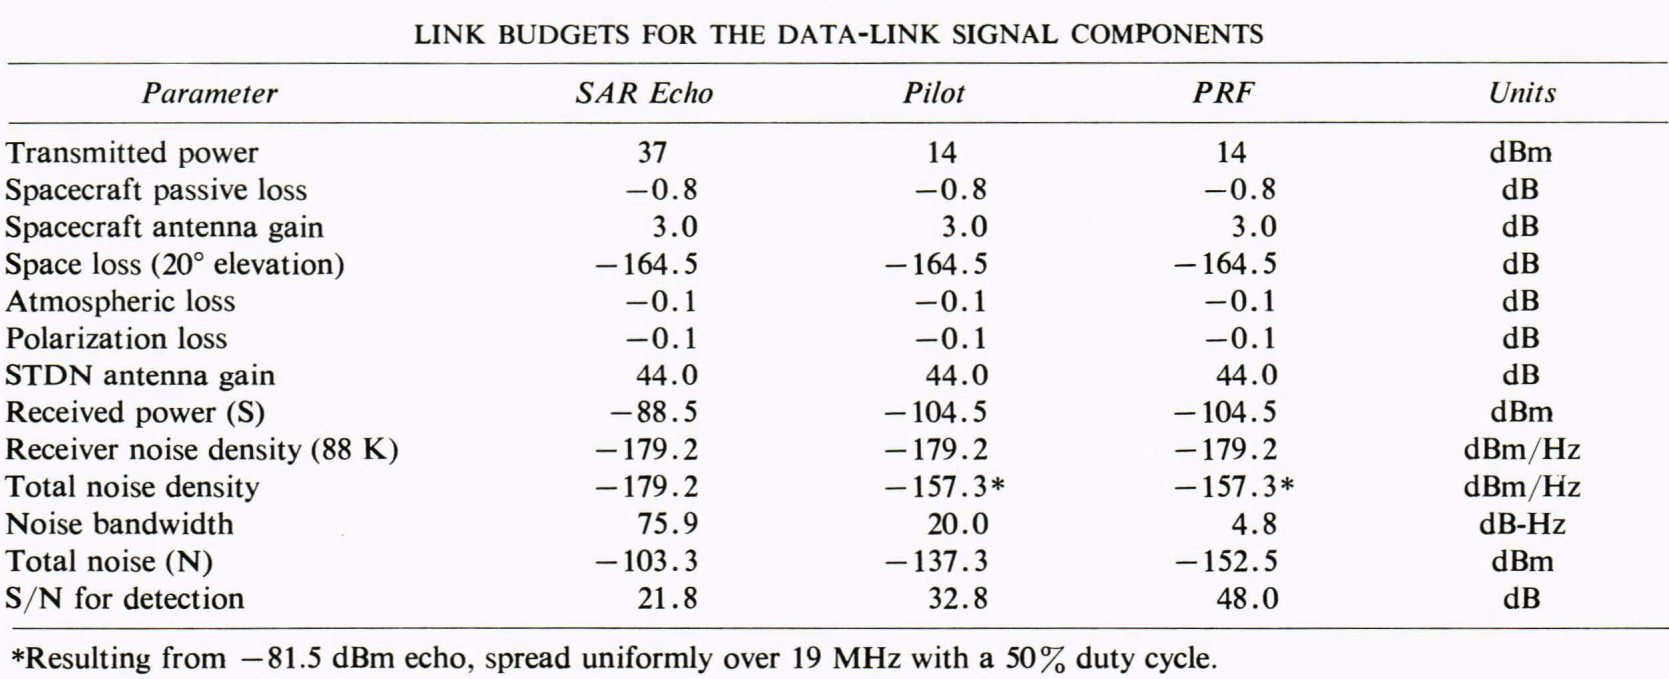

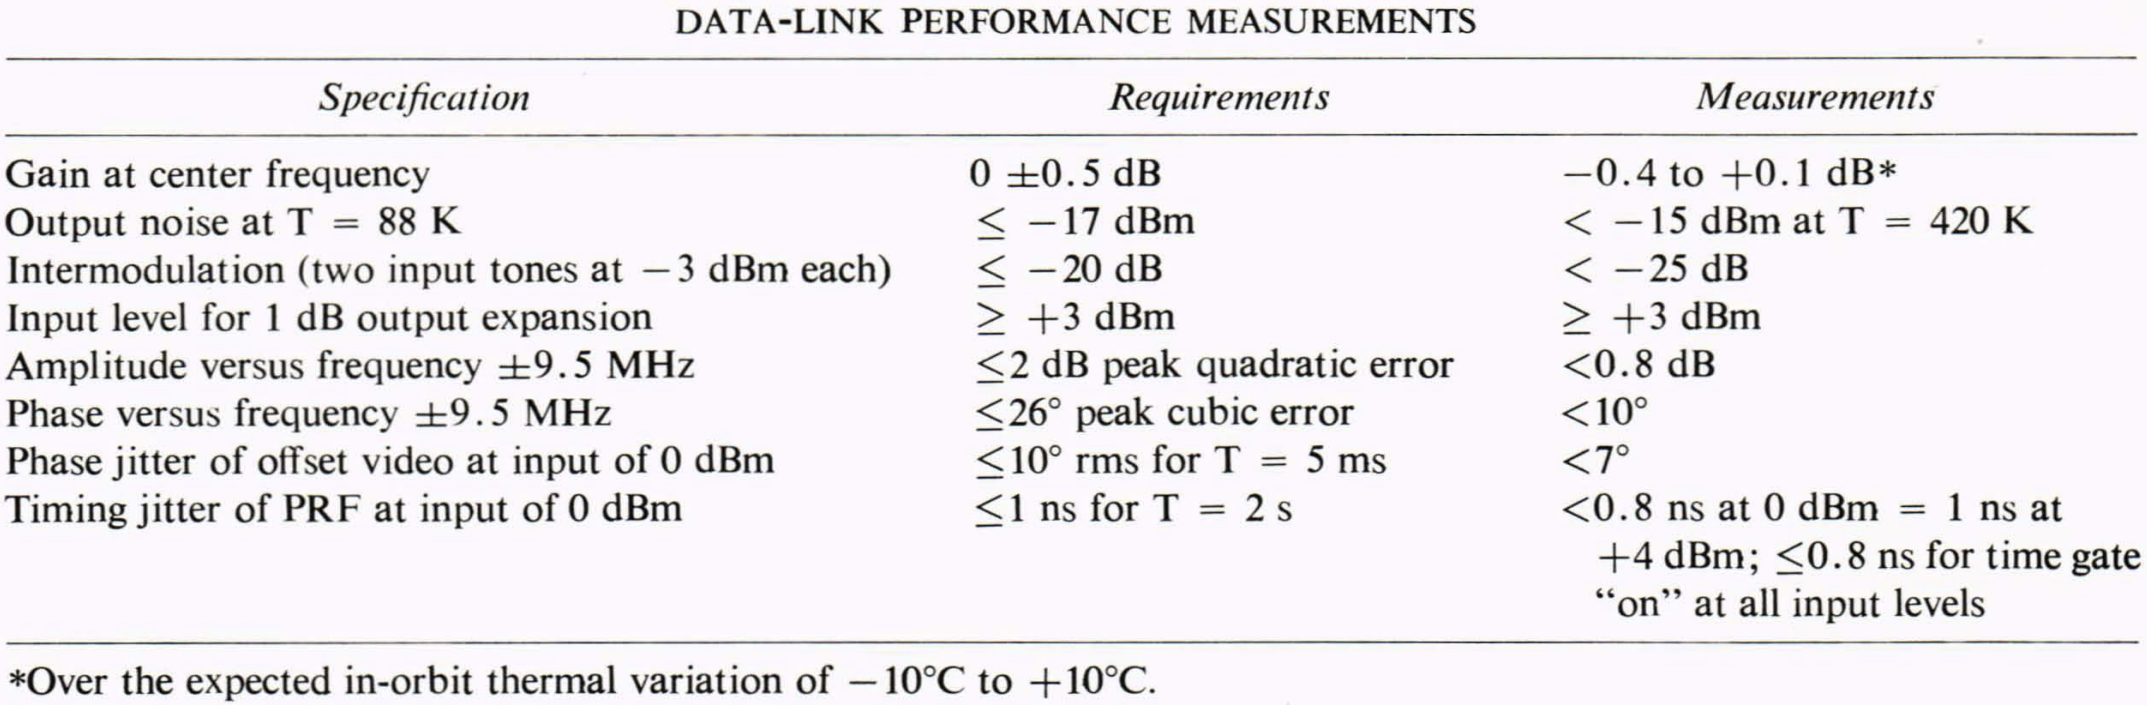

In [75]:
# # Effective Aperture
# def effective_aperture(antenna_gain_dBi, wavelength):
#     # Approximate effective aperture calculation
#     return (wavelength**2 * 10**(antenna_gain_dBi / 10)) / (4 * np.pi)

# # Free-Space Path Loss (L_fs)
# def free_space_path_loss(range_meters, frequency_Hz):
#     return 20 * np.log10(range_meters) + 20 * np.log10(frequency_Hz / 1e9) - 2*antenna_gain_dBi  # L_fs in dB

# # Slant Range Resolution
# def slant_range_resolution(bandwidth):
#     return c / (2 * bandwidth)

# # Noise Power
# def noise_power(k, T0, bandwidth, noise_figure_dB):
#     noise_power_linear = k * T0 * bandwidth
#     noise_power_dBm = 10 * np.log10(noise_power_linear)
#     return noise_power_dBm + noise_figure_dB

# # Received Power (P_r)
# def received_power(transmit_power_dBm, antenna_gain_dBi, range_meters):
#     free_space_loss_dB = free_space_path_loss(range_meters, center_freq)
#     return transmit_power_dBm + 2 * antenna_gain_dBi - free_space_loss_dB

# # SNR
# def snr(transmit_power_dBm, antenna_gain_dBi, noise_power_dBm, range_meters):
#     received_power_dBm = transmit_power_dBm + 2 * antenna_gain_dBi - 20 * np.log10(range_meters) - 20 * np.log10(center_freq / 1e9) + 20 * np.log10(wavelength)
#     return received_power_dBm - noise_power_dBm

# Noise Power Calculation
# noise_power_dBm = noise_power(k, T0, bandwidth_Hz, noise_figure_dB)

# Slant Range Testing
slant_ranges = np.linspace(600e3, 1600e3, 10)  # Example slant ranges from 100 km to 1000 km
snr_values = []
fspl_values = []
received_power_values = []
snr_values = []


for range_meters in slant_ranges:
    free_space_loss_dB = free_space_path_loss(range_meters, center_freq)
    received_power_dBm = transmit_power_dBm + antenna_gain_dBi - free_space_loss_dB

    fspl_value = free_space_path_loss(range_meters, center_freq)
    fspl_values.append(fspl_value)
    
    received_power_value = received_power(transmit_power_dBm, antenna_gain_dBi, range_meters)
    received_power_values.append(received_power_value)
    
    snr_value = snr(transmit_power_dBm, antenna_gain_dBi, noise_power_dBm, range_meters)
    snr_values.append(snr_value)

    # print(f"Slant Range: {range_meters / 1e3:.2f} km")
    # print(f"Free-Space Path Loss (L_fs): {free_space_loss_dB:.2f} dB")
    # print(f"Received Signal Power (P_r): {received_power_dBm:.2f} dBm")
    # print(f"SNR: {snr_value:.2f} dB")
    # print('-' * 40)
# Can I assume image area and coverage area as the same?
# what are the minimum dimensions of our "TARGET?" I'm trying to downsize the antenna as much as possible
# assume data budget is for optical sensor?
# what are other deliverables for payload outsie of V&V with STK?

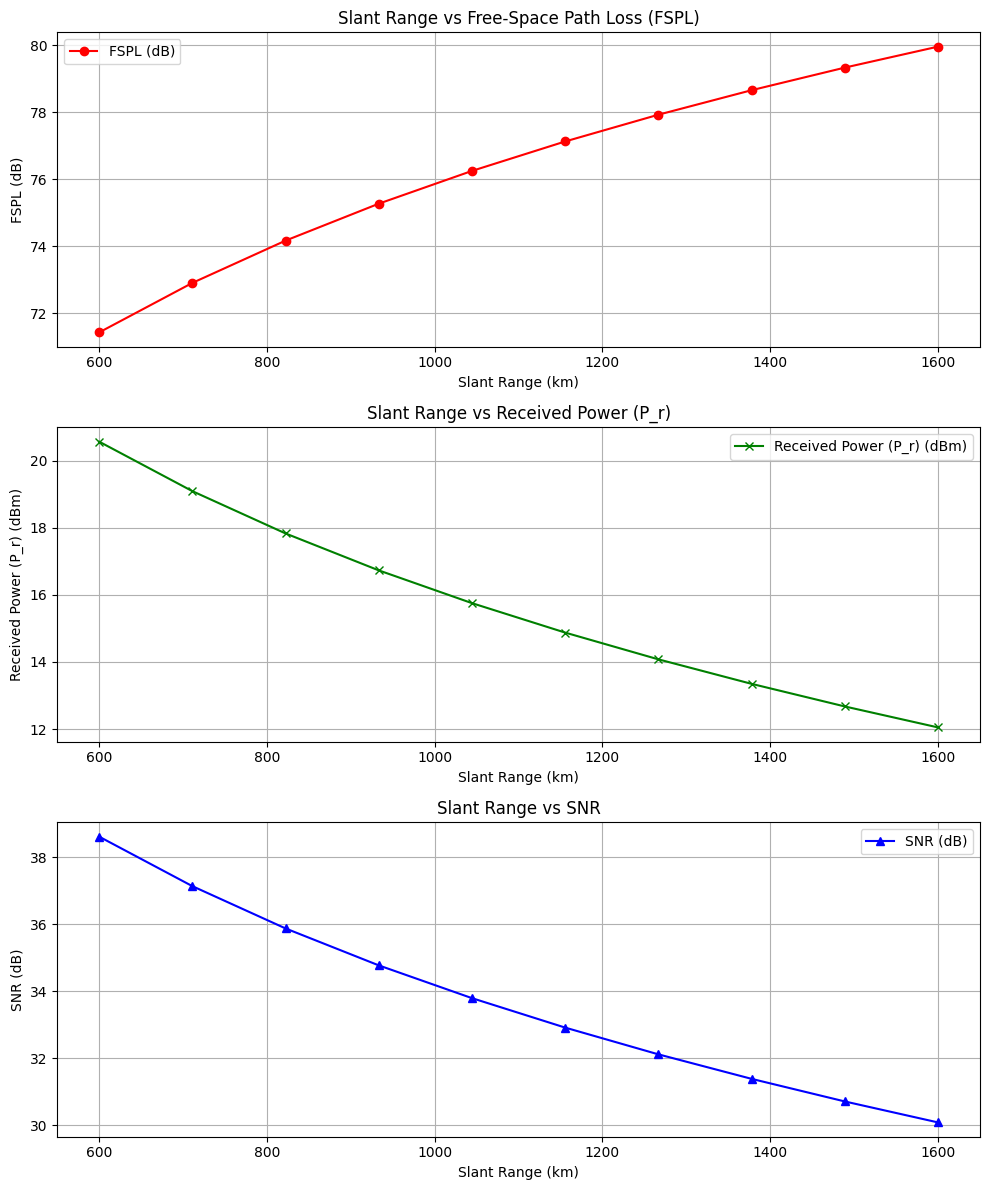

In [76]:
# Create a figure with 3 subplots (one column)
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# First subplot: Slant Range vs FSPL
axs[0].plot(slant_ranges / 1e3, fspl_values, label="FSPL (dB)", color='r', marker='o')
axs[0].set_title('Slant Range vs Free-Space Path Loss (FSPL)')
axs[0].set_xlabel('Slant Range (km)')
axs[0].set_ylabel('FSPL (dB)')
axs[0].grid(True)
axs[0].legend()

# Second subplot: Slant Range vs Received Power (P_r)
axs[1].plot(slant_ranges / 1e3, received_power_values, label="Received Power (P_r) (dBm)", color='g', marker='x')
axs[1].set_title('Slant Range vs Received Power (P_r)')
axs[1].set_xlabel('Slant Range (km)')
axs[1].set_ylabel('Received Power (P_r) (dBm)')
axs[1].grid(True)
axs[1].legend()

# Third subplot: Slant Range vs SNR
axs[2].plot(slant_ranges / 1e3, snr_values, label="SNR (dB)", color='b', marker='^')
axs[2].set_title('Slant Range vs SNR')
axs[2].set_xlabel('Slant Range (km)')
axs[2].set_ylabel('SNR (dB)')
axs[2].grid(True)
axs[2].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the combined plot
plt.show()


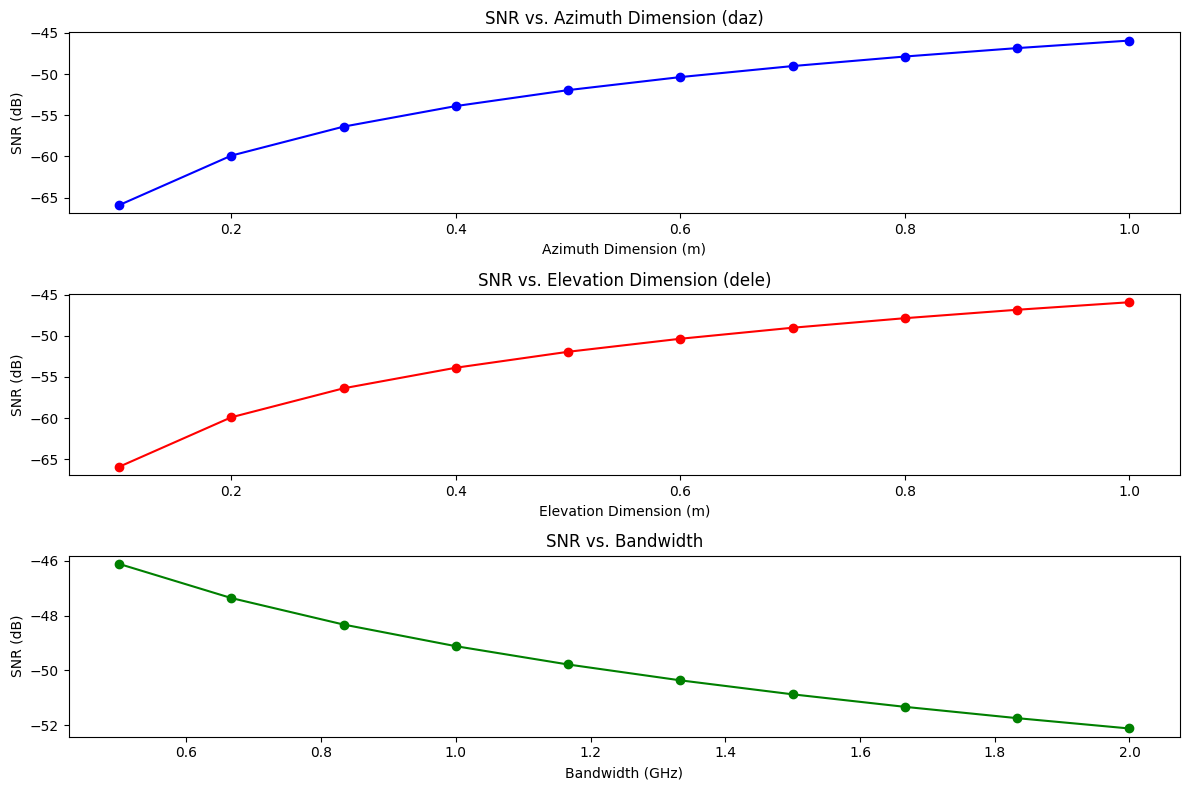

In [77]:
# Function to compute SNR dynamically
def dynamic_snr(daz_new, dele_new, bw_new):
    G_t = G_r = 10**(gain_from_size(daz_new, dele_new, λ) / 10)  # Linear gain
    snr = compute_snr(P, R, σ, G_t, G_r, λ, bw_new, T, L)
    return snr  # Return SNR in dB

# Define ranges of daz, dele, and bw to test
daz_values = np.linspace(0.1, 1.0, 10)  # Azimuth dimension range (m)
dele_values = np.linspace(0.1, 1.0, 10)  # Elevation dimension range (m)
bw_values = np.linspace(0.5e9, 2.0e9, 10)  # Bandwidth range (Hz)

# Compute SNR for different daz, dele, and bw values
snr_daz = [dynamic_snr(daz, dele_values[5], bw_values[5]) for daz in daz_values]
snr_dele = [dynamic_snr(daz_values[5], dele, bw_values[5]) for dele in dele_values]
snr_bw = [dynamic_snr(daz_values[5], dele_values[5], bw) for bw in bw_values]

# Plot SNR vs. daz
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(daz_values, snr_daz, marker='o', color='b')
plt.title("SNR vs. Azimuth Dimension (daz)")
plt.xlabel("Azimuth Dimension (m)")
plt.ylabel("SNR (dB)")

# Plot SNR vs. dele
plt.subplot(3, 1, 2)
plt.plot(dele_values, snr_dele, marker='o', color='r')
plt.title("SNR vs. Elevation Dimension (dele)")
plt.xlabel("Elevation Dimension (m)")
plt.ylabel("SNR (dB)")

# Plot SNR vs. Bandwidth
plt.subplot(3, 1, 3)
plt.plot(bw_values / 1e9, snr_bw, marker='o', color='g')
plt.title("SNR vs. Bandwidth")
plt.xlabel("Bandwidth (GHz)")
plt.ylabel("SNR (dB)")

plt.tight_layout()
plt.show()


In [78]:
# Antenna gain (linear from dBi)
def gain_from_size(daz, dele, λ):
    A = daz * dele  # Effective area (m^2)
    G_linear = (4 * np.pi * A) / λ**2  # Linear gain
    return 10 * np.log10(G_linear)  # Gain in dB

# SNR calculation based on radar equation
def compute_snr(P, R, σ, G_t, G_r, λ, B, T, L):
    # Radar equation for SNR
    SNR_linear = (P * G_t * G_r * λ**2 * σ) / ((4 * np.pi)**3 * R**4 * k * T * B * L)
    return 10 * np.log10(SNR_linear)  # Convert to dB

# Function to compute SNR dynamically
def dynamic_snr(daz_new, dele_new, bw_new):
    G_t = G_r = 10**(gain_from_size(daz_new, dele_new, λ) / 10)  # Linear gain
    snr = compute_snr(P, R, σ, G_t, G_r, λ, bw_new, T, L)
    return snr  # Return SNR in dB

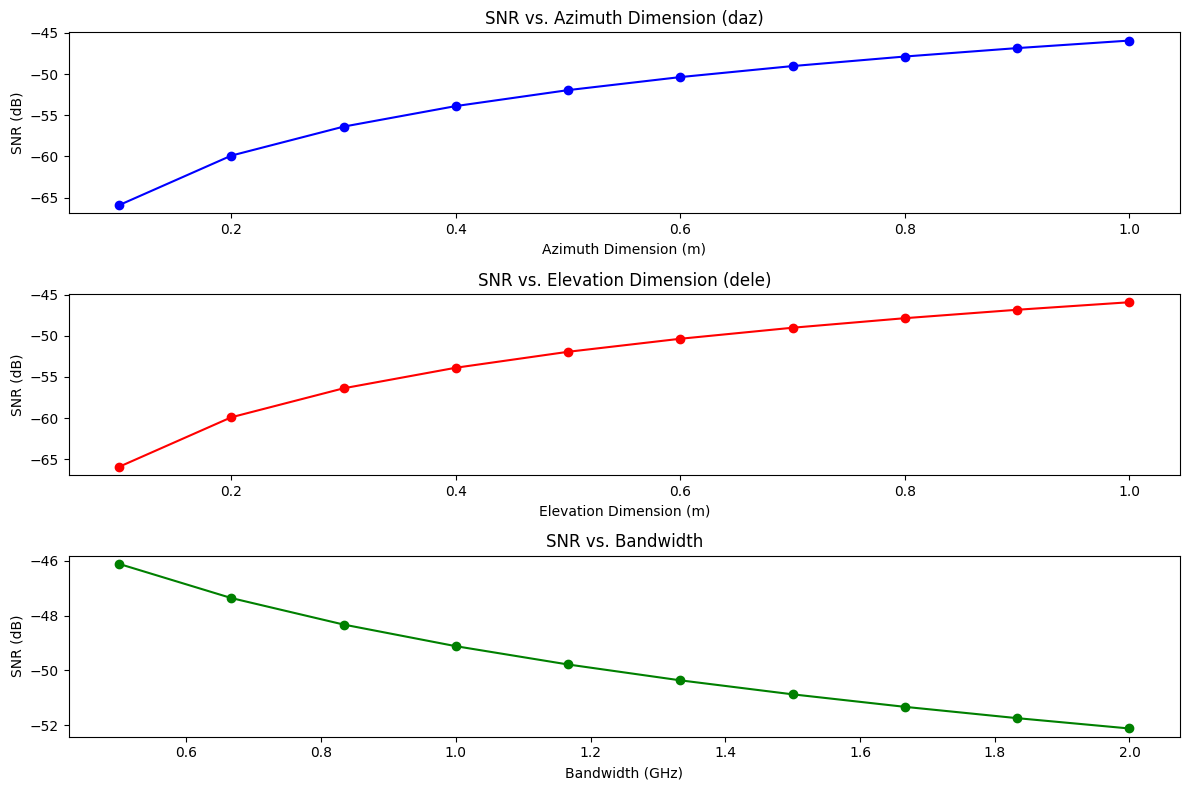

In [79]:
# Define ranges of daz, dele, and bw to test
daz_values = np.linspace(0.1, 1.0, 10)  # Azimuth dimension range (m)
dele_values = np.linspace(0.1, 1.0, 10)  # Elevation dimension range (m)
bw_values = np.linspace(0.5e9, 2.0e9, 10)  # Bandwidth range (Hz)

# Compute SNR for different daz, dele, and bw values
snr_daz = [dynamic_snr(daz, dele_values[5], bw_values[5]) for daz in daz_values]
snr_dele = [dynamic_snr(daz_values[5], dele, bw_values[5]) for dele in dele_values]
snr_bw = [dynamic_snr(daz_values[5], dele_values[5], bw) for bw in bw_values]

# Plot SNR vs. daz
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(daz_values, snr_daz, marker='o', color='b')
plt.title("SNR vs. Azimuth Dimension (daz)")
plt.xlabel("Azimuth Dimension (m)")
plt.ylabel("SNR (dB)")

# Plot SNR vs. dele
plt.subplot(3, 1, 2)
plt.plot(dele_values, snr_dele, marker='o', color='r')
plt.title("SNR vs. Elevation Dimension (dele)")
plt.xlabel("Elevation Dimension (m)")
plt.ylabel("SNR (dB)")

# Plot SNR vs. Bandwidth
plt.subplot(3, 1, 3)
plt.plot(bw_values / 1e9, snr_bw, marker='o', color='g')
plt.title("SNR vs. Bandwidth")
plt.xlabel("Bandwidth (GHz)")
plt.ylabel("SNR (dB)")

plt.tight_layout()
plt.show()


Required Bandwidth: 500.00 MHz
Antenna Length for Azimuth Resolution: 61341.85 m
Required SNR for Pd = 0.9 and Pfa = 1e-06: 9.59 dB


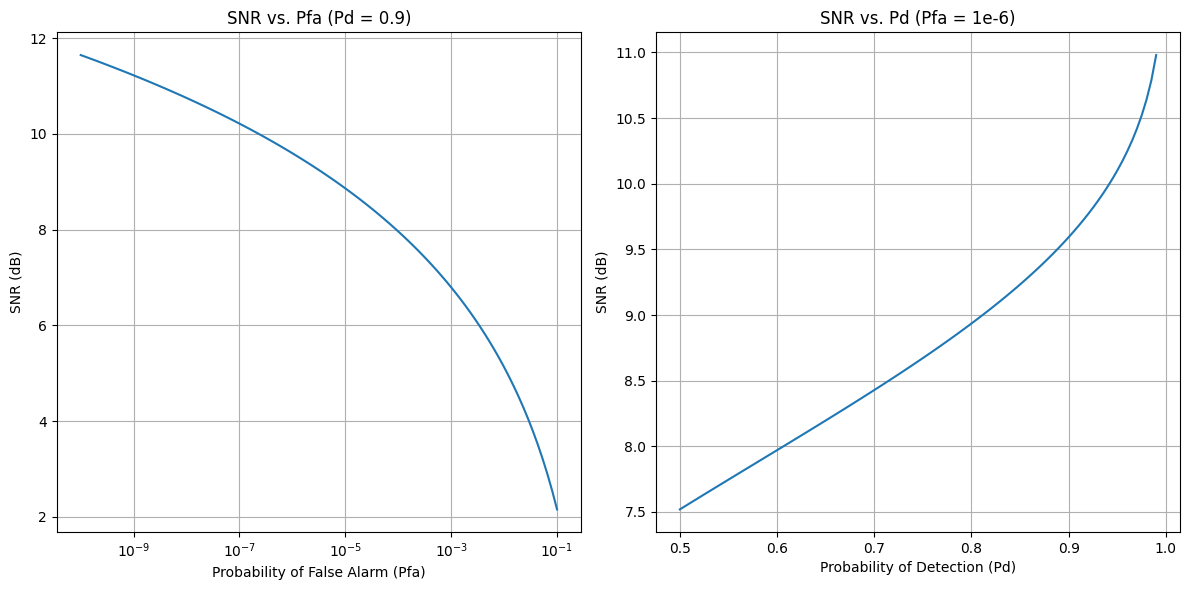

In [84]:
# Desired parameters
azimuth_resolution = 0.5  # m
slant_range_resolution = 0.3  # m
scene_size = (5e3, 5e3)  # Scene size in meters (5x5 km)
look_angle_range = (25, 50)  # Look angle range in degrees

# Radar signal config
f = 7.825e9  # Frequency (Hz)
λ = c / f  # Wavelength (m)

# Slant Range Resolution -> Bandwidth
def calculate_bandwidth(slant_range_resolution):
    return c / (2 * slant_range_resolution)

# Azimuth Resolution -> Antenna length
def calculate_antenna_length(azimuth_resolution, slant_range, λ):
    return λ * slant_range / (2 * azimuth_resolution)

# Probability Detection and False Alarm Relation
def snr_from_pd_pfa(pd, pfa):
    return 10 * np.log10((sp.erfcinv(2 * pd) - sp.erfcinv(2 * pfa))**2 / 2)

# Example assumptions for Pd and Pfa
pd = 0.9  # Probability of detection
pfa = 1e-6  # Probability of false alarm

# SNR threshold calculation
required_snr = snr_from_pd_pfa(pd, pfa)

# Calculate Bandwidth and Antenna Length
bandwidth = calculate_bandwidth(slant_range_resolution)
slant_range = 1600e3  # Slant range equal to orbit height in meters
antenna_length = calculate_antenna_length(azimuth_resolution, slant_range, λ)

# Display results
print(f"Required Bandwidth: {bandwidth / 1e6:.2f} MHz")
print(f"Antenna Length for Azimuth Resolution: {antenna_length:.2f} m")
print(f"Required SNR for Pd = {pd} and Pfa = {pfa}: {required_snr:.2f} dB")

# Plot SNR for varying Pd and Pfa
pfa_values = np.logspace(-10, -1, 100)
pd_values = np.linspace(0.5, 0.99, 100)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(pfa_values, [snr_from_pd_pfa(0.9, pfa) for pfa in pfa_values])
plt.xscale('log')
plt.xlabel('Probability of False Alarm (Pfa)')
plt.ylabel('SNR (dB)')
plt.title('SNR vs. Pfa (Pd = 0.9)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(pd_values, [snr_from_pd_pfa(pd, 1e-6) for pd in pd_values])
plt.xlabel('Probability of Detection (Pd)')
plt.ylabel('SNR (dB)')
plt.title('SNR vs. Pd (Pfa = 1e-6)')
plt.grid(True)

plt.tight_layout()
plt.show()


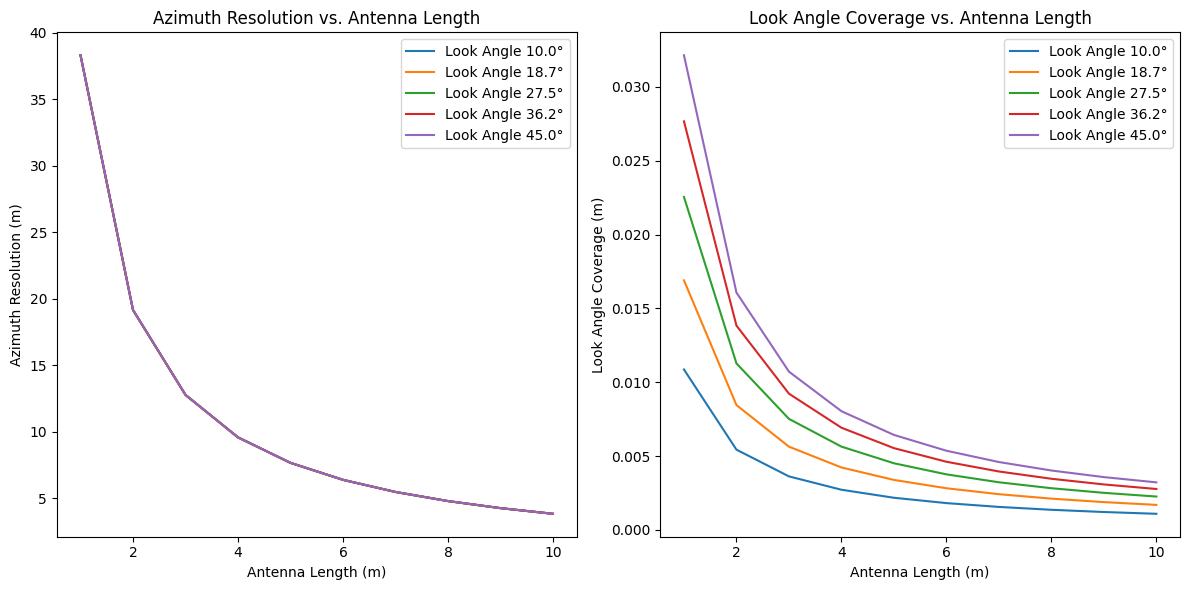

In [81]:
# Constants
wavelength = 0.03831214  # in meters (example value, adjust as needed)
frequency = 7.825e9  # in Hz (example value, adjust as needed)
speed_of_light = 3e8  # m/s

# Antenna length (capped at 10 meters)
max_antenna_length = 10  # meters

def calculate_azimuth_resolution(antenna_length, wavelength):
    """Calculate azimuth resolution based on antenna length and wavelength."""
    return wavelength * 1000 / antenna_length  # resolution in meters

def calculate_look_angle_coverage(look_angle, wavelength, antenna_length):
    """Calculate look angle coverage."""
    return 2 * np.pi * (np.cos(look_angle) - np.cos(look_angle + np.radians(10))) * wavelength / antenna_length
# Define range of antenna lengths and look angles
antenna_lengths = np.linspace(1, max_antenna_length, 10)  # from 1m to 10m
look_angles = np.linspace(np.radians(10), np.radians(45), 5)  # look angles from 10° to 45°

# Initialize lists to store results
azimuth_resolutions = []
look_angle_coverages = []

# Iterate over antenna lengths and look angles
for length in antenna_lengths:
    for angle in look_angles:
        res = calculate_azimuth_resolution(length, wavelength)
        coverage = calculate_look_angle_coverage(angle, wavelength, length)
        
        azimuth_resolutions.append((length, angle, res))
        look_angle_coverages.append((length, angle, coverage))
# Convert results to arrays for plotting
azimuth_resolutions = np.array(azimuth_resolutions)
look_angle_coverages = np.array(look_angle_coverages)

# Plot azimuth resolution vs antenna length
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for angle in np.unique(azimuth_resolutions[:, 1]):
    subset = azimuth_resolutions[azimuth_resolutions[:, 1] == angle]
    plt.plot(subset[:, 0], subset[:, 2], label=f'Look Angle {np.degrees(angle):.1f}°')
plt.xlabel('Antenna Length (m)')
plt.ylabel('Azimuth Resolution (m)')
plt.title('Azimuth Resolution vs. Antenna Length')
plt.legend()

# Plot look angle coverage vs antenna length
plt.subplot(1, 2, 2)
for angle in np.unique(look_angle_coverages[:, 1]):
    subset = look_angle_coverages[look_angle_coverages[:, 1] == angle]
    plt.plot(subset[:, 0], subset[:, 2], label=f'Look Angle {np.degrees(angle):.1f}°')
plt.xlabel('Antenna Length (m)')
plt.ylabel('Look Angle Coverage (m)')
plt.title('Look Angle Coverage vs. Antenna Length')
plt.legend()

plt.tight_layout()
plt.show()
